In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
df= pd.read_csv("nearest-earth-objects(1910-2024).csv")
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [143]:
print("Number of Rows: {0} , Number of Columns: {1}".format(df.shape[0], df.shape[1]))

Number of Rows: 338199 , Number of Columns: 9


In [144]:
# Informaion about the dataframe like index number of rows and columns  and columns name adn type and how many non null valuesin the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [145]:
# count and mean and std min max quantiles of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
neo_id,338199.0,1.759939e+07,2.287225e+07,2.000433e+06,3.373980e+06,3.742127e+06,5.405374e+07,5.446281e+07
absolute_magnitude,338171.0,2.293252e+01,2.911216e+00,9.250000e+00,2.074000e+01,2.280000e+01,2.510000e+01,3.358000e+01
estimated_diameter_min,338171.0,1.578120e-01,3.138851e-01,5.111578e-04,2.538370e-02,7.320740e-02,1.890406e-01,3.754525e+01
estimated_diameter_max,338171.0,3.528785e-01,7.018685e-01,1.142983e-03,5.675969e-02,1.636967e-01,4.227075e-01,8.395373e+01
relative_velocity,338199.0,5.106066e+04,2.639924e+04,2.033464e+02,3.071203e+04,4.756047e+04,6.667382e+04,2.917811e+05
miss_distance,338199.0,4.153535e+07,2.077399e+07,6.745533e+03,2.494540e+07,4.332674e+07,5.933961e+07,7.479865e+07


In [146]:
# count and unique of object columns
df.describe(include='object')

,name,orbiting_body
count,338199,338199
unique,33514,1
top,277810 (2006 FV35),Earth
freq,211,338199


In [147]:
df.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [148]:
# see if there is null and how many null in each column
df.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [149]:
# the percentage of null values of columns
na_percentage=df.isna().sum()/df.shape[0]*100
print(na_percentage)

neo_id                    0.000000
name                      0.000000
absolute_magnitude        0.008279
estimated_diameter_min    0.008279
estimated_diameter_max    0.008279
orbiting_body             0.000000
relative_velocity         0.000000
miss_distance             0.000000
is_hazardous              0.000000
dtype: float64


In [150]:
# number of duplicated rows
df.duplicated().sum()

0

In [151]:
# check what every column values 
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

neo_id : 33514
neo_id
2277810     211
2469219     197
3678630     192
3771633     186
54353620    169
Name: count, dtype: int64

********************

name : 33514
name
277810 (2006 FV35)               211
469219 Kamo`oalewa (2016 HO3)    197
(2014 OL339)                     192
(2017 FZ2)                       186
(2023 FW13)                      169
Name: count, dtype: int64

********************

absolute_magnitude : 1778
absolute_magnitude
24.4    2208
26.1    2088
24.6    2083
25.5    2048
24.8    2038
Name: count, dtype: int64

********************

estimated_diameter_min : 1778
estimated_diameter_min
0.035039    2208
0.016016    2088
0.031956    2083
0.021113    2048
0.029144    2038
Name: count, dtype: int64

********************

estimated_diameter_max : 1778
estimated_diameter_max
0.078350    2208
0.035813    2088
0.071456    2083
0.047211    2048
0.065169    2038
Name: count, dtype: int64

********************

orbiting_body : 1
orbiting_body
Earth    338199
Name: count, dty

In [152]:
# after investigation of the values in the top cell we will drop the unwatned column in the beginning like id and name and orbiting_body
df.drop(["neo_id", "name", "orbiting_body"],axis =1 ,inplace = True)
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


In [153]:
# the percentage of null values of columns
na_percentage=df.isna().sum()/df.shape[0]*100
print(na_percentage)

absolute_magnitude        0.008279
estimated_diameter_min    0.008279
estimated_diameter_max    0.008279
relative_velocity         0.000000
miss_distance             0.000000
is_hazardous              0.000000
dtype: float64


In [154]:
# to know how to deals with every column
df.dtypes

absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
relative_velocity         float64
miss_distance             float64
is_hazardous                 bool
dtype: object

In [155]:
# we have just three columns that has the same amount of null values  and maybe it is in the same rows so i will get rid of the null
df.dropna(subset= df.columns, inplace = True)
# the percentage of null values of columns
na_percentage=df.isna().sum()/df.shape[0]*100
print(na_percentage)

absolute_magnitude        0.0
estimated_diameter_min    0.0
estimated_diameter_max    0.0
relative_velocity         0.0
miss_distance             0.0
is_hazardous              0.0
dtype: float64


In [156]:
#check the shape of the data
df.shape

(338171, 6)

## EDA

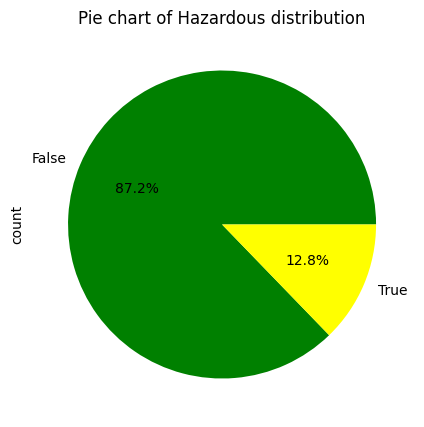

In [157]:
# pie chart to know the percentage between if it is hazardous or not
plt.figure(figsize=(6,5))
df['is_hazardous'].value_counts().plot(kind='pie' , autopct='%1.1f%%' , colors=['green', 'yellow'])
plt.title('Pie chart of Hazardous distribution')
plt.show()

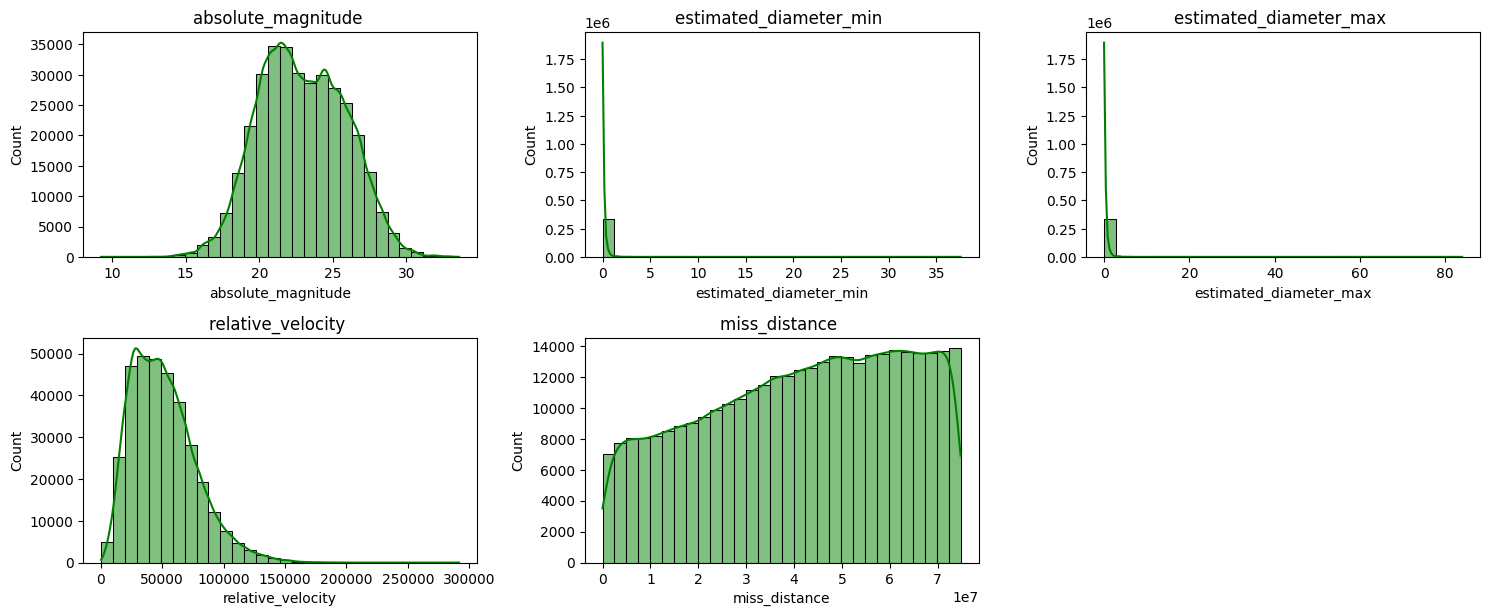

In [158]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=df, x=feature, bins=30, kde=True ,color="green")
    plt.title(f'{feature} ')
plt.tight_layout()

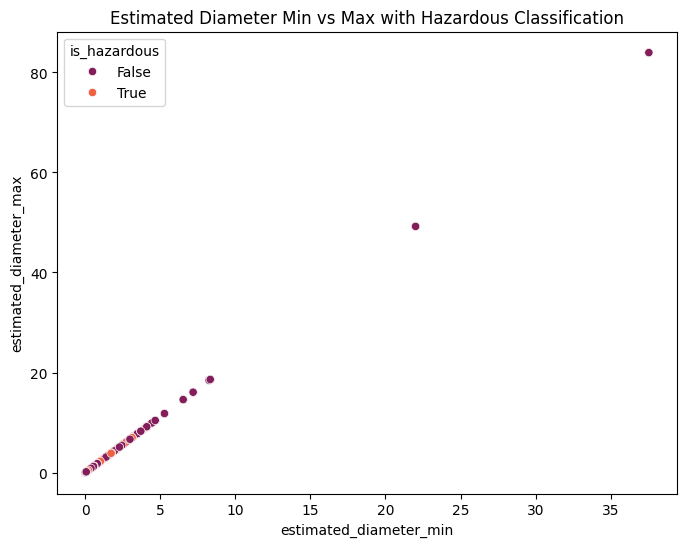

In [159]:
#Estimated Diameter Min vs Max colored by Hazardous
plt.figure(figsize=(8, 6))
sns.scatterplot(x='estimated_diameter_min', y='estimated_diameter_max', hue='is_hazardous', data=df , palette="rocket")
plt.title('Estimated Diameter Min vs Max with Hazardous Classification')
plt.show()

In [160]:
df.columns

Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance',
       'is_hazardous'],
      dtype='object')

## Data Preparation

In [161]:
#Encode the target column 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#Fit and transform is_hazardous data
df["is_hazardous"] = label_encoder.fit_transform(df["is_hazardous"])
df

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07,0
...,...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07,0
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07,0
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07,0
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06,0


In [162]:
#check the dataframe types
df.dtypes

absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
relative_velocity         float64
miss_distance             float64
is_hazardous                int64
dtype: object

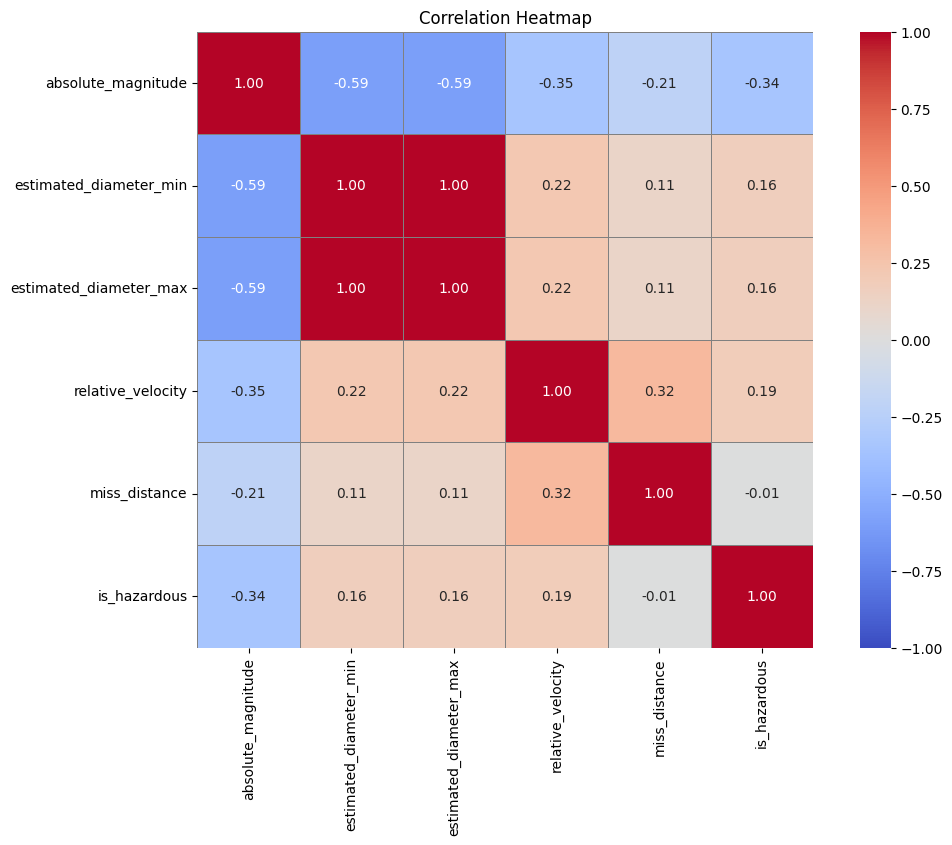

In [163]:
# HeatMap and Select the Feature that we need
corr = df.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt =".2f", vmin = -1 , vmax = 1, center = 0 ,
            linewidths = 0.5, linecolor = "grey", square = True )
plt.title("Correlation Heatmap")
plt.show()

In [164]:
""" to the heatmap i found to things first thing is that estimated_diameter_min and _estimated_diameter_max
has 1 correlation so it will be redundant if i keep them both so i will remove one of them  and second thing 
i just found out that the relation between miss_distance and is_hazardous(our target column) is -0.01 which is nearly zero so there is
no relation between these two so i will remove miss_distance column too
"""

' to the heatmap i found to things first thing is that estimated_diameter_min and _estimated_diameter_max\nhas 1 correlation so it will be redundant if i keep them both so i will remove one of them  and second thing \ni just found out that the relation between miss_distance and is_hazardous(our target column) is -0.01 which is nearly zero so there is\nno relation between these two so i will remove miss_distance column too\n'

In [165]:
df.drop(["estimated_diameter_min", "miss_distance"],axis =1 ,inplace = True)
df.head()

,absolute_magnitude,estimated_diameter_max,relative_velocity,is_hazardous
0,19.14,0.883161,71745.401048,0
1,18.50,1.185878,109949.757148,1
2,21.45,0.304818,24865.506798,0
3,20.63,0.444672,78890.076805,0
4,22.70,0.171412,56036.519484,0


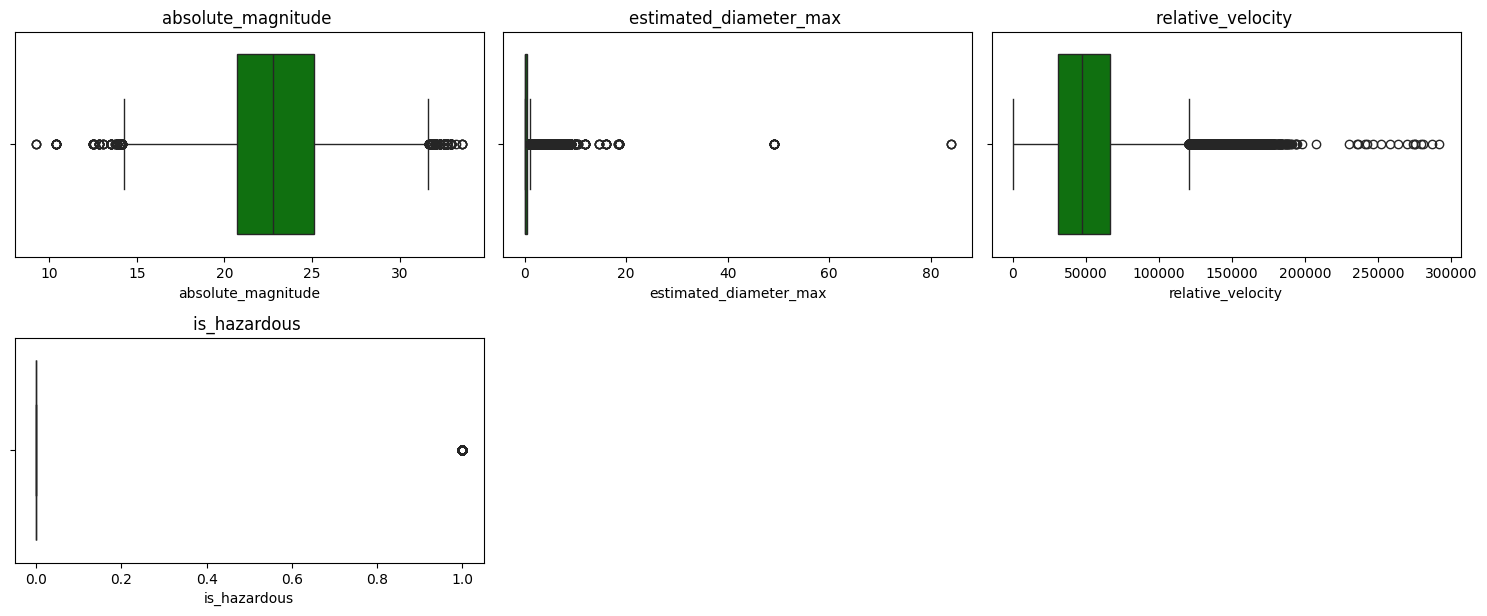

In [166]:
#now we check if there is outliers or not if there we will handle them
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=df, x=feature ,color="green")
    plt.title(f'{feature} ')
plt.tight_layout()

In [167]:
data_column = ['absolute_magnitude', 
                    'estimated_diameter_max', 'relative_velocity']
for col in data_column:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.shape

(307302, 4)

In [168]:
df.head()

,absolute_magnitude,estimated_diameter_max,relative_velocity,is_hazardous
0,19.14,0.883161,71745.401048,0
2,21.45,0.304818,24865.506798,0
3,20.63,0.444672,78890.076805,0
4,22.70,0.171412,56036.519484,0
5,25.00,0.059435,47477.649832,0


In [169]:
# now after hanlding the Outliers we will scale our data
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler instance
scaler = MinMaxScaler()


# Fit the scaler on the specified columns and transform the data
df[data_column] = scaler.fit_transform(df[columns_to_scale])

# Check the scaled DataFrame
print(df.head())

   absolute_magnitude  estimated_diameter_max  relative_velocity  is_hazardous
0            0.015785                0.911753           0.612777             0
2            0.198106                0.312765           0.211238             0
3            0.133386                0.457612           0.673973             0
4            0.296764                0.174597           0.478226             0
5            0.478295                0.058623           0.404917             0


In [170]:
#now we gonna use the oversampling Smote method to handle the imbalance in our target column
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting data into features (X) and target (y)
X = df.drop(columns=['is_hazardous'])  # Features
y = df['is_hazardous']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_train_resampled.value_counts())


Original class distribution: is_hazardous
0    217770
1     28071
Name: count, dtype: int64
Resampled class distribution: is_hazardous
1    217770
0    217770
Name: count, dtype: int64


In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import accuracy_score

# Instantiate the model
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X_train_resampled, y_train_resampled)
# Predict on the test set
y_pred = rf_model.predict(X_test)
# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Recall: 0.8802
Precision: 0.8905
Accuracy: 0.8802
